In [2]:

import sqlite3
import pandas as pd
from pandas import DataFrame, Series

conn_sales = sqlite3.connect('Sales.db')

In [47]:
sql_sales = """
                select year, month, sum(amount) as '총판매량'
                from sales
                where year = 2018 and month = 2;
"""
DF_Tsales = pd.read_sql_query(sql_sales, conn_sales)
DF_Tsales = DF_Tsales.set_index(['year', 'month'])

sql_lsales = """
                select year, month, sum(amount) as '라거판매량'
                from sales
                where year = 2018 and month = 2
                and cat2 = 21 or cat1 = 61;
"""
DF_Lsales = pd.read_sql_query(sql_lsales, conn_sales)
DF_Lsales = DF_Lsales.set_index(['year', 'month'])

sql_asales = """
                select year, month, sum(amount) as '에일판매량'
                from sales
                where year = 2018 and month = 2
                and cat2 = 22 or cat2 = 62;
"""
DF_Asales = pd.read_sql_query(sql_asales, conn_sales)
DF_Asales = DF_Asales.set_index(['year', 'month'])
sql_fsales = """
                select year, month, sum(amount) as '음식판매량'
                from sales
                where year = 2018 and month = 2
                and cat2 = 31 or cat2 = 30;
"""
DF_Fsales = pd.read_sql_query(sql_fsales, conn_sales)
DF_Fsales = DF_Fsales.set_index(['year', 'month'])

sql_csales = """
                select year, month, sum(amount) as '치킨판매량'
                from sales
                where (year = 2018 and month = 2)
                and (cat2 = 35 or cat2 = 36 or cat2 = 37);
"""
DF_Csales = pd.read_sql_query(sql_csales, conn_sales)
DF_Csales = DF_Csales.set_index(['year', 'month'])

DF_sales = pd.concat([DF_Tsales, DF_Lsales, DF_Asales, DF_Fsales, DF_Csales], axis=1)
DF_sales

,,총판매량,라거판매량,에일판매량,음식판매량,치킨판매량
year,month,,,,,
2018,2,25373200,6579238,10777371,8391119,3857517


In [32]:
matplotlib.matplotlib_fname()

u'/Users/kwool/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [33]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

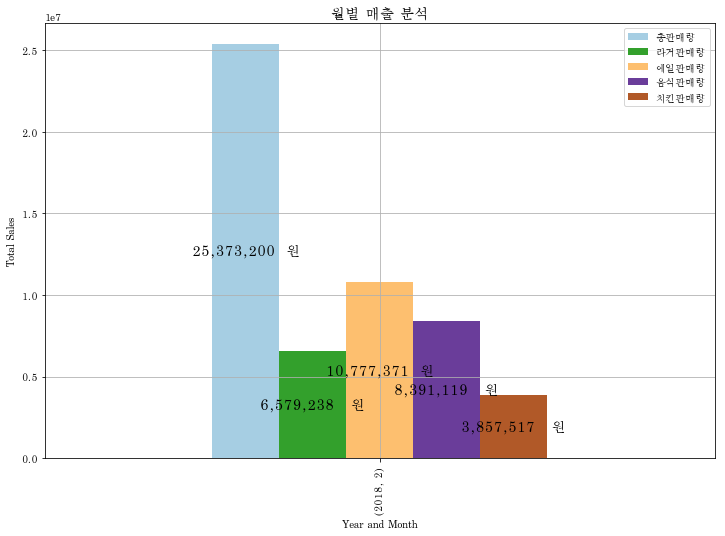

In [98]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


fig = plt.figure()
ax = DF_sales.plot.bar(stacked=False, figsize=(12,8), grid=True, colormap='Paired')

plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams['font.size'] = 12
plt.title(u'월별 매출 분석')

ax.set_xlabel('Year and Month')
ax.set_ylabel('Total Sales')


labels = []

for i in DF_sales.index:
    for j in DF_sales.columns:
        value_str = u"{:<12,}원".format(int(DF_sales.loc[i][j])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=14)

fig  = ax.get_figure()
fig.savefig('1-1-Sales-Total.png')
plt.show()




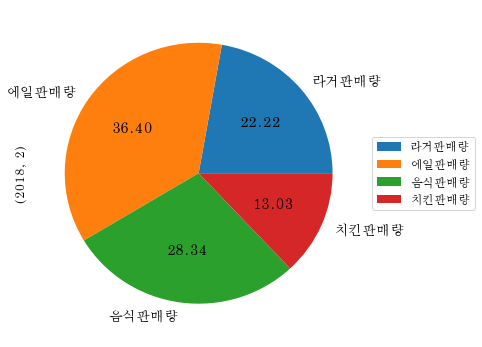

In [102]:
fig = plt.figure()

ax = DF_sales[['라거판매량','에일판매량','음식판매량','치킨판매량']].T.plot.\
    pie(subplots=True, figsize=(6,6), autopct='%.2f', fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig = ax[0].get_figure()
fig.savefig('1-2-Sales-Rate.png')
plt.show()

## Ale  Sales

## Food Sales